# My first project of computer vision 

Description 
The training archive contains 2500 images of dogs and cats. Train your algorithm on these files and predict the labels for test1.zip (1 = dog, 0 = cat).

##Link of the dataset
https://www.kaggle.com/c/dogs-vs-cats/data?select=train.zip

## Preparing data

In [25]:
import os, shutil
original_dataset_dir = r'C:\Users\sebastian sossa\Documents\deepLearning\convets1\all_data'


# Directory where we going to store the smaller data 
base_dir = r'C:\Users\sebastian sossa\Documents\deepLearning\convets1\cats_and_dogs_small'

# Creates a directory for train
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
# Creates a directory for validation
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
# Creates a directory for test
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
#Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
#Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with validation cat pictores 
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
#Directory with validation dogs pictures 
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
# Directory with test  cat pictores 
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
#Directory with test dogs pictures 
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

#-----------------------Cats----------------------------------
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
#Copies the first 1.000 car images to train_cats_dir (direcory for train)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 images  to validation directory
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)


# Copies the next 500 images  to test directory
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

#-----------------------Dogs----------------------------------

#Copyes the 1st 1000 images to train directory
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#Copies the next 500 images to calidation directory
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

#Copyes the next 500 to test directory
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [41]:
base_dir = r'C:\Users\sebastian sossa\Documents\deepLearning\convets1\cats_and_dogs_small'
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')

Here we check the amount of pictores per split (train/validation/test)

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [5]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [6]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))


total validation cat images: 500


In [7]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [8]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [9]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


## building the network 

The model will end with a single unit (dense layer), because we are dealing with binary-classificaction problem and a sigmoid activation

In [10]:
#Here we import the necessary libraries
from keras import layers
from keras import models

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))

# first neuron
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#Second neuron
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#Third neuron
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#Fourth neuron
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#Last neuron 
model.add(layers.Dense(512, activation='relu'))
#En with a unique neuron because is a binary problem
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Compiling the model

In [13]:
from keras import optimizers

In [14]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

We use RMSprop as usual, on the loss use binary cross entropy because the neuron ends with a single neuron

## Data preproceing

Data should be in floating-point tensors before we fed into the network 
We need to do the following: 
1.  Read the picture files.
2.  Decode the JPEG content to RGB grids of pixels.
3.  Convert these into floating-point tensors.
4.  Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know,
neural networks prefer to deal with small input values).

Keras has an especial module to do it possible located at keras.preprocessing.image with the class ImageDataGenerator

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
#Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    #Target directory (the directory that we created at the init)
    train_dir,

    #Resizes all images to 150x150
    target_size=(150,150),

    #Set the batch size to 20
    batch_size=20,

    #We need binary labels
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

print(len(train_generator))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
100


In [17]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


## fitting the model 
We use in this case fit_generator, the method equivalet of fit for data generators.
It expect as first argument a python generator that yield batches of inputs and targets indefinitely.
We use steps_per_epoch because the data is being generated endlessly, the keras model needs to know how many samples draw from the generatos before declaring a epoch over, so in this case we set 100 steps before the model pass to the other batch

In [18]:
# history = model.fit_generator(
#     train_generator, 
#     steps_per_epoch=100,
#     epochs=30,
#     validation_data=validation_generator,
#     validation_steps=50)

In [19]:
# Saving the model 
model.save('cats_and_dogs_small_1.h5')

## Displaying curves of loss and during training

In [20]:
import matplotlib.pyplot as plt

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

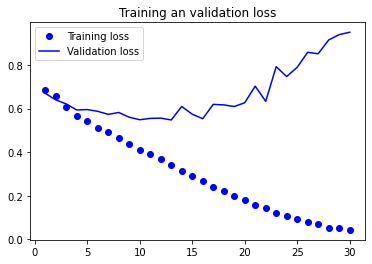

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training an validation loss')
plt.legend()
plt.show()

These two plots are characteristic of overfitting
1. Trainig accuracy increases linearly overtime until until it reaches nearly 100% whereas the validation accuracy stalls at 70%-72%
2. Te validation loss reaches its minimun after only 5 epochs and then stalls, whereas the trainig loss keeps decreasing nearly until it reaches 0 

## Using data agumentation 
In this case overfitting is caused because there are too few samples to learn from, and the model cant generalize

Data augmentation takes the aproach of getting more traning data from existing samples, by augmenting the samples via a number of random transformation.
The goal is that at training time, your model will never see the exact same pictore twice

In [22]:
#In keras is done by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range= 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

1. **rotation_range** is a value in degrees (0–180), a range within which to randomly rotate pictures.
2. **width_shift** and height_shift are ranges (as a fraction of total width or
height) within which to randomly translate pictures vertically or horizontally.
3. **shear_range** is for randomly applying shearing transformations.
4. **zoom_range** is for randomly zooming inside pictures.
5. **horizontal_flip** is for randomly flipping half the images horizontally—relevant when there are no assumptions of horizontal asymmetry (for example, real-world pictures).
6. **fill_mode** is the strategy used for filling in newly created pixels, which can
appear after a rotation or a width/height shift.

## Displaying some randomly augmented training images

In [23]:
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt

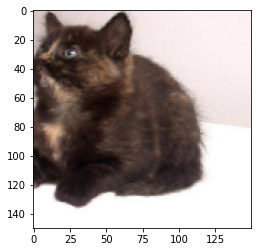

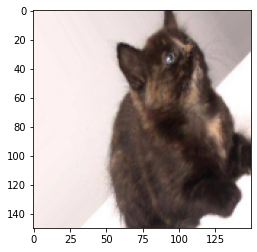

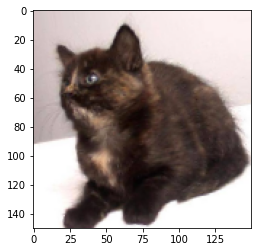

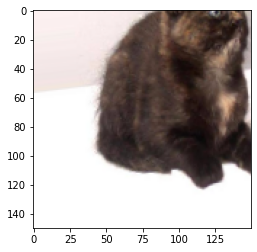

In [27]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

#Choose one image to augment
img_path = fnames[100]

#Reads the image and resize it 
img = image.load_img(img_path, target_size=(150, 150))

#Converts it to Numpy array with shape(150, 150, 3)
x = image.img_to_array(img)
#Reshapes it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

#Generates batches of randomly transformed images.
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    #Loops indefinitely so we need to break at some point
    i += 1
    if i % 4 == 0:
        break
plt.show()



If we train a new network using this data augmentation configuration, the network will never see the same input at twice

## Defining a new convet that includes dropout

In [30]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

#Dropout method to helps the model to not overfit
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),  metrics=['acc'])

## Training the new model 

In [31]:
#Makes all the data agumentation that we saw before
train_datagen1 = ImageDataGenerator(
        rescale= 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)

#Reescale  the values into the range 0-1
test_datagen1 = ImageDataGenerator(rescale=1./255)

#Converts the images into tensor of 150x150 and batches of 20
train_generator1 = train_datagen1.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator1 = test_datagen1.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

for data_batch, labels_batch in train_generator1:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

print(len(train_generator1))
print(len(validation_generator1))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)
100
50


In [32]:

#Fitting the model, it takes  steps before the model pass to another batch
history_2_model = model.fit_generator(
                train_generator1,
                steps_per_epoch=100,
                epochs=100,
                validation_data=validation_generator1,
                validation_steps=50
                )


Epoch 1/100


C:\Users\sebastian sossa\AppData\Local\Temp\ipykernel_54832\3464517759.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_2_model = model.fit_generator(


100/100 [==============================] - 63s 620ms/step - loss: 0.6939 - acc: 0.5150 - val_loss: 0.6878 - val_acc: 0.5460
Epoch 2/100
100/100 [==============================] - 54s 544ms/step - loss: 0.6860 - acc: 0.5415 - val_loss: 0.6667 - val_acc: 0.5930
Epoch 3/100
100/100 [==============================] - 55s 545ms/step - loss: 0.6741 - acc: 0.5775 - val_loss: 0.6616 - val_acc: 0.5950
Epoch 4/100
100/100 [==============================] - 52s 515ms/step - loss: 0.6656 - acc: 0.5900 - val_loss: 0.6470 - val_acc: 0.6110
Epoch 5/100
100/100 [==============================] - 50s 495ms/step - loss: 0.6566 - acc: 0.6140 - val_loss: 0.6961 - val_acc: 0.5480
Epoch 6/100
100/100 [==============================] - 51s 512ms/step - loss: 0.6475 - acc: 0.6290 - val_loss: 0.6184 - val_acc: 0.6470
Epoch 7/100
100/100 [==============================] - 50s 500ms/step - loss: 0.6232 - acc: 0.6540 - val_loss: 0.5954 - val_acc: 0.6740
Epoch 8/100
100/100 [==============================] - 50s 5

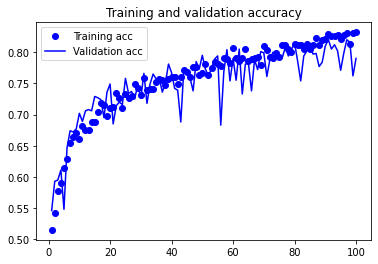

In [34]:
acc = history_2_model .history['acc']
val_acc = history_2_model .history['val_acc']
loss = history_2_model .history['loss']
val_loss = history_2_model .history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

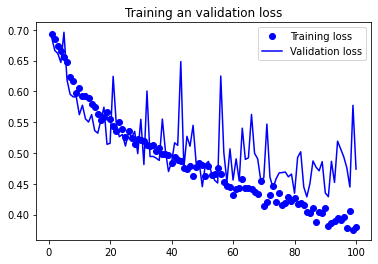

In [35]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training an validation loss')
plt.legend()
plt.show()

In this case we have a better performance on the model, but because the amount of data is to little, we can reach more than 80% on accuracy

## Using a pretrained model

Use pretrained models is usualy a good aproach to small image data set in deep learning, a pretrained network is a saved network that was prevously trained on a large dataset

in  this case we going to use VGG16 it’s a simple and widely used convnet architecture for ImageNet.

**There are two ways to use a pretrained network  feature extraction and fine-tuning.**

### Feature extraction
Feature extraction consists of using the representations learned by a previous network
to extract interesting features from new samples. These features are then run through
a new classifier, which is trained from scratch.

In [1]:
# We can import the model directly from keras 
from keras.applications import VGG16

In [2]:
conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(150,150,3))   

58889256/58889256 [==============================] - 16s 0us/step


1. weights specifies the weight checkpoint from which to initialize the model.
2. include_top refers to including (or not) the densely connected classifier on
top of the network. By default, this densely connected classifier corresponds to
the 1,000 classes from ImageNet. Because you intend to use your own densely
connected classifier (with only two classes: cat and dog), you don’t need to
include it.
3. input_shape is the shape of the image tensors that you’ll feed to the network.
This argument is purely optional: if you don’t pass it, the network will be able to
process inputs of any size.

In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

There are two ways to continue the process
1. Running the convolutional base over your dataset, recording its output to a
Numpy array on disk, and then using this data as input to a standalone, densely
connected classifier (is fast and cheaper, but cant data  augmentation)
2. Extending the model you have (conv_base) by adding Dense layers on top, and
running the whole thing end to end on the input data. (is more expensive than the first, but can use data augmentation)

### Running the convolutional base over the dataset

**Extracting features using pretrained convolutional network base**

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


base_dir = r'C:\Users\sebastian sossa\Documents\deepLearning\convets1\cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
    directory,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            #Generators yield data indefitely, thats why we need to put a break some where
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 1s 888ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 954ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 895ms/step


The extracted features are shape (samples, 4, 4, 512), we need to feed them to a densely connected classifier, so we must flatten the to (samples, 8192)

In [5]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

Defining the densely connected classifier 

In [7]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
            loss='binary_crossentropy',
            metrics=['acc'])

history = model.fit(train_features, train_labels,
            epochs=30,
            batch_size=20,
            validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 5s 40ms/step - loss: 0.6156 - acc: 0.6610 - val_loss: 0.4390 - val_acc: 0.8220
Epoch 2/30
100/100 [==============================] - 3s 32ms/step - loss: 0.4290 - acc: 0.8095 - val_loss: 0.3574 - val_acc: 0.8580
Epoch 3/30
100/100 [==============================] - 3s 30ms/step - loss: 0.3551 - acc: 0.8500 - val_loss: 0.3178 - val_acc: 0.8760
Epoch 4/30
100/100 [==============================] - 3s 29ms/step - loss: 0.3138 - acc: 0.8745 - val_loss: 0.2993 - val_acc: 0.8760
Epoch 5/30
100/100 [==============================] - 3s 32ms/step - loss: 0.2790 - acc: 0.8895 - val_loss: 0.2808 - val_acc: 0.8890
Epoch 6/30
100/100 [==============================] - 4s 36ms/step - loss: 0.2596 - acc: 0.8980 - val_loss: 0.2699 - val_acc: 0.8950
Epoch 7/30
100/100 [==============================] - 4s 35ms/step - loss: 0.2436 - acc: 0.9080 - val_loss: 0.2620 - val_acc: 0.8970
Epoch 8/30
100/100 [==============================] - 3s 33ms/step - 

**Plots of loss and accuracy**

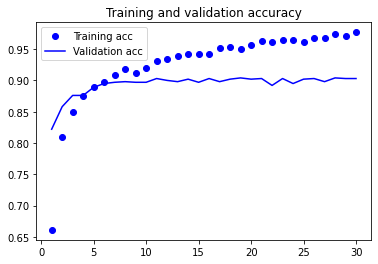

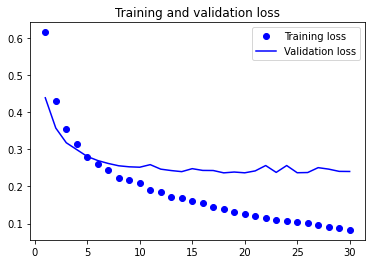

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In this case we have a clear overfitting, this because we didnt use **data aumentation**

### Extending the model you have (conv_base) by adding Dense layers on top

In this case we add the model just like if it were another layer

In [9]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


We need to freeze the convolutional base before we compile the model, it means preventing the weights from being updated during training.
If we don’t do this, then the representations that were previously learned by the convolutional base will be modified during training

In [11]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [13]:
conv_base.trainable = False

In [14]:
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))


This is the number of trainable weights after freezing the conv base: 4


In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
        optimizer=optimizers.RMSprop(lr=2e-5),
        metrics=['acc'])

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


c:\Users\sebastian sossa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\sebastian sossa\AppData\Local\Temp\ipykernel_3468\4184069510.py:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 141s 1s/step - loss: 0.6045 - acc: 0.6640 - val_loss: 0.4664 - val_acc: 0.8140
Epoch 2/30
100/100 [==============================] - 142s 1s/step - loss: 0.4920 - acc: 0.7830 - val_loss: 0.3849 - val_acc: 0.8490
Epoch 3/30
100/100 [==============================] - 139s 1s/step - loss: 0.4400 - acc: 0.8005 - val_loss: 0.3366 - val_acc: 0.8620
Epoch 4/30
100/100 [==============================] - 143s 1s/step - loss: 0.4103 - acc: 0.8245 - val_loss: 0.3130 - val_acc: 0.8820
Epoch 5/30
100/100 [==============================] - 143s 1s/step - loss: 0.3906 - acc: 0.8175 - val_loss: 0.3122 - val_acc: 0.8790
Epoch 6/30
100/100 [==============================] - 137s 1s/step - loss: 0.3718 - acc: 0.8405 - val_loss: 0.2844 - val_acc: 0.8810
Epoch 7/30
100/100 [==============================] - 133s 1s/step - loss: 0.3588 - acc: 0.8390 - val_loss: 0.3088 - val_acc: 0.8710
Epoch 8/30
100/100 [==============================] - 129s 1s/step - 

**Ploting loss and accuracy**

range(1, 31)


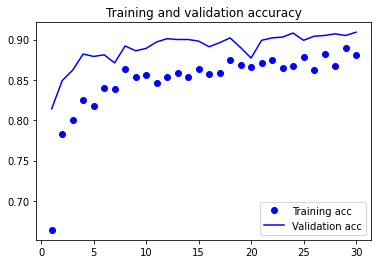

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()


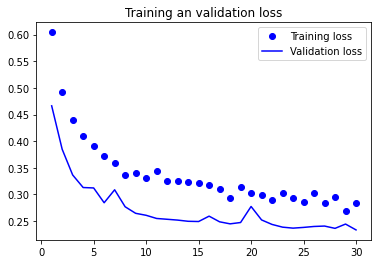

In [33]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training an validation loss')
plt.legend()
plt.show()

As we can see this is the best accuracy that we have ever reach in this model and the lowest loss 

## Fine-tuning
Is a techniquque for modeule reuse, complementary to feature extraction, consist of unfreezong a few of the top layers of a frozen model base used for feature extraction

#### Graph of how works it

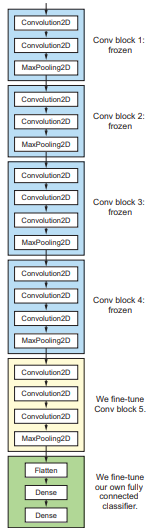

**Steps for fine tuning**
1. Add your custom network on top of an already-trained base network.
2. Freeze the base network.
3. Train the part you added.
4. Unfreeze some layers in the base network.
5. Jointly train both these layers and the part you added

**Why not unfreeze all the layers?**
* Earlier layers in the convolutional base encode more-generic, reusable features,
whereas layers higher up encode more-specialized features. It’s more useful to
fine-tune the more specialized features, because these are the ones that need to
be repurposed on your new problem. There would be fast-decreasing returns in
fine-tuning lower layers.
* The more parameters you’re training, the more you’re at risk of overfitting.
The convolutional base has 15 million parameters, so it would be risky to
attempt to train it on your small dataset

### Freezing layers 

In [34]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Now we can begin fine-tuning our network, we going to do this with RMSProp optimizer, using very low learning rate. The reason for using a low learning rate is that
we want to limit the magnitude of the modifications you make to the representations
of the three layers you’re fine-tuning. Updates that are too large may harm these representations

In [35]:
model.compile(loss='binary_crossentropy',
        optimizer=optimizers.RMSprop(lr=1e-5),
        metrics=['acc'])
        
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)

c:\Users\sebastian sossa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\sebastian sossa\AppData\Local\Temp\ipykernel_3468\730977371.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 174s 2s/step - loss: 0.3086 - acc: 0.8615 - val_loss: 0.2234 - val_acc: 0.9110
Epoch 2/100
100/100 [==============================] - 169s 2s/step - loss: 0.2656 - acc: 0.8940 - val_loss: 0.2116 - val_acc: 0.9130
Epoch 3/100
100/100 [==============================] - 171s 2s/step - loss: 0.2258 - acc: 0.9035 - val_loss: 0.2517 - val_acc: 0.9030
Epoch 4/100
100/100 [==============================] - 182s 2s/step - loss: 0.2174 - acc: 0.9120 - val_loss: 0.2078 - val_acc: 0.9220
Epoch 5/100
100/100 [==============================] - 178s 2s/step - loss: 0.1954 - acc: 0.9155 - val_loss: 0.1874 - val_acc: 0.9250
Epoch 6/100
100/100 [==============================] - 180s 2s/step - loss: 0.1811 - acc: 0.9225 - val_loss: 0.1923 - val_acc: 0.9290
Epoch 7/100
100/100 [==============================] - 172s 2s/step - loss: 0.1844 - acc: 0.9215 - val_loss: 0.2109 - val_acc: 0.9210
Epoch 8/100
100/100 [==============================] - 169s 2s

**Ploting loss and accuracy of the new model**

range(1, 101)


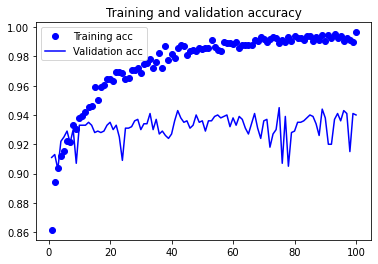

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

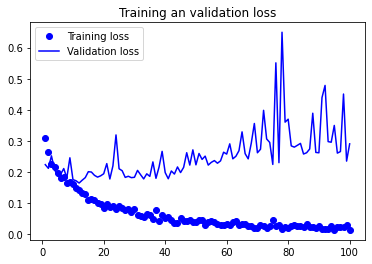

In [37]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training an validation loss')
plt.legend()
plt.show()

### Testing our model 

In [38]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


C:\Users\sebastian sossa\AppData\Local\Temp\ipykernel_3468\2505688056.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.9319999814033508


**We have a great accuracy of 93% with applying all the techinques presented**

## predicting into the model 

In [66]:
def predicter(to_predict):
    prediction = model.predict(to_predict)
    rounded_down_integer_array = prediction.astype(int)
    print(rounded_down_integer_array)
    if rounded_down_integer_array == 1:
        return 'Is a Dog'
    else: 
        return 'Is a Cat'

In [44]:
prediction_path = r'C:\Users\sebastian sossa\Documents\deepLearning\convets1\prediction'
prediction_dir = os.path.join(prediction_path)
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt

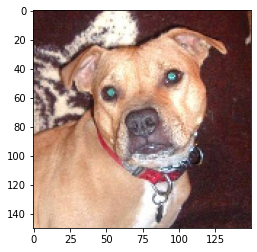

In [51]:
photo = '2.jpg'
names = os.path.join(prediction_dir, photo)

#Choose one image to augment
img_path = names

#Reads the image and resize it 
img = image.load_img(img_path, target_size=(150, 150))

#Converts it to Numpy array with shape(150, 150, 3)
x = image.img_to_array(img)
#Reshapes it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

mgplot = plt.imshow(image.array_to_img(batch[0]))

plt.show()


In [56]:
predicter(x)

1/1 [==============================] - 0s 97ms/step


'Is a Dog'

### Second prediction 

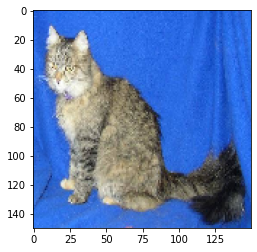

In [70]:
photo = '136.jpg'
names = os.path.join(prediction_dir, photo)

#Choose one image to augment
img_path = names

#Reads the image and resize it 
cat_img = image.load_img(img_path, target_size=(150, 150))

#Converts it to Numpy array with shape(150, 150, 3)
cat = image.img_to_array(cat_img)
#Reshapes it to (1, 150, 150, 3)
cat = cat.reshape((1,) + cat.shape)

mgplot = plt.imshow(cat_img)
plt.show()


In [71]:
predicter(cat)

1/1 [==============================] - 0s 133ms/step
[[0]]


'Is a Cat'

### Third prediction

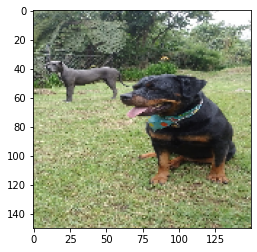

In [76]:
photo = 'arya.jpeg'
names = os.path.join(prediction_dir, photo)

#Choose one image to augment
img_path = names

#Reads the image and resize it 
arya_img = image.load_img(img_path, target_size=(150, 150))

#Converts it to Numpy array with shape(150, 150, 3)
arya = image.img_to_array(arya_img)
#Reshapes it to (1, 150, 150, 3)
arya = arya.reshape((1,) + arya.shape)

mgplot = plt.imshow(arya_img)
plt.show()

In [77]:
predicter(arya)

1/1 [==============================] - 0s 145ms/step
[[1]]


'Is a Dog'